In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV


In [19]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\weatherHistory.csv")


In [20]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [21]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [16]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [3]:
# Convert 'Formatted Date' to dat
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)


In [4]:
weather_data = df.drop(columns=['Loud Cover'])

In [5]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5064\1326705179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


In [6]:
weather_data['Year'] = weather_data['Formatted Date'].dt.year
weather_data['Month'] = weather_data['Formatted Date'].dt.month
weather_data['Day'] = weather_data['Formatted Date'].dt.day
weather_data['Hour'] = weather_data['Formatted Date'].dt.hour

In [7]:
X = weather_data.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Temperature (C)'], axis=1)
y = weather_data['Temperature (C)']

In [8]:
# Convert categorical variable to numeric
X = pd.get_dummies(X, columns=['Precip Type'])

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [11]:
results = {}
predictions_dict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_dict[name] = predictions
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [12]:
results_df = pd.DataFrame(results).T
print(results_df)

                             MAE        MSE      RMSE
Linear Regression       0.741432   0.897526  0.947379
Decision Tree           0.023602   0.006361  0.079756
Random Forest           0.013313   0.002182  0.046711
Support Vector Machine  4.909621  36.395106  6.032836
Gradient Boosting       0.142564   0.042755  0.206772


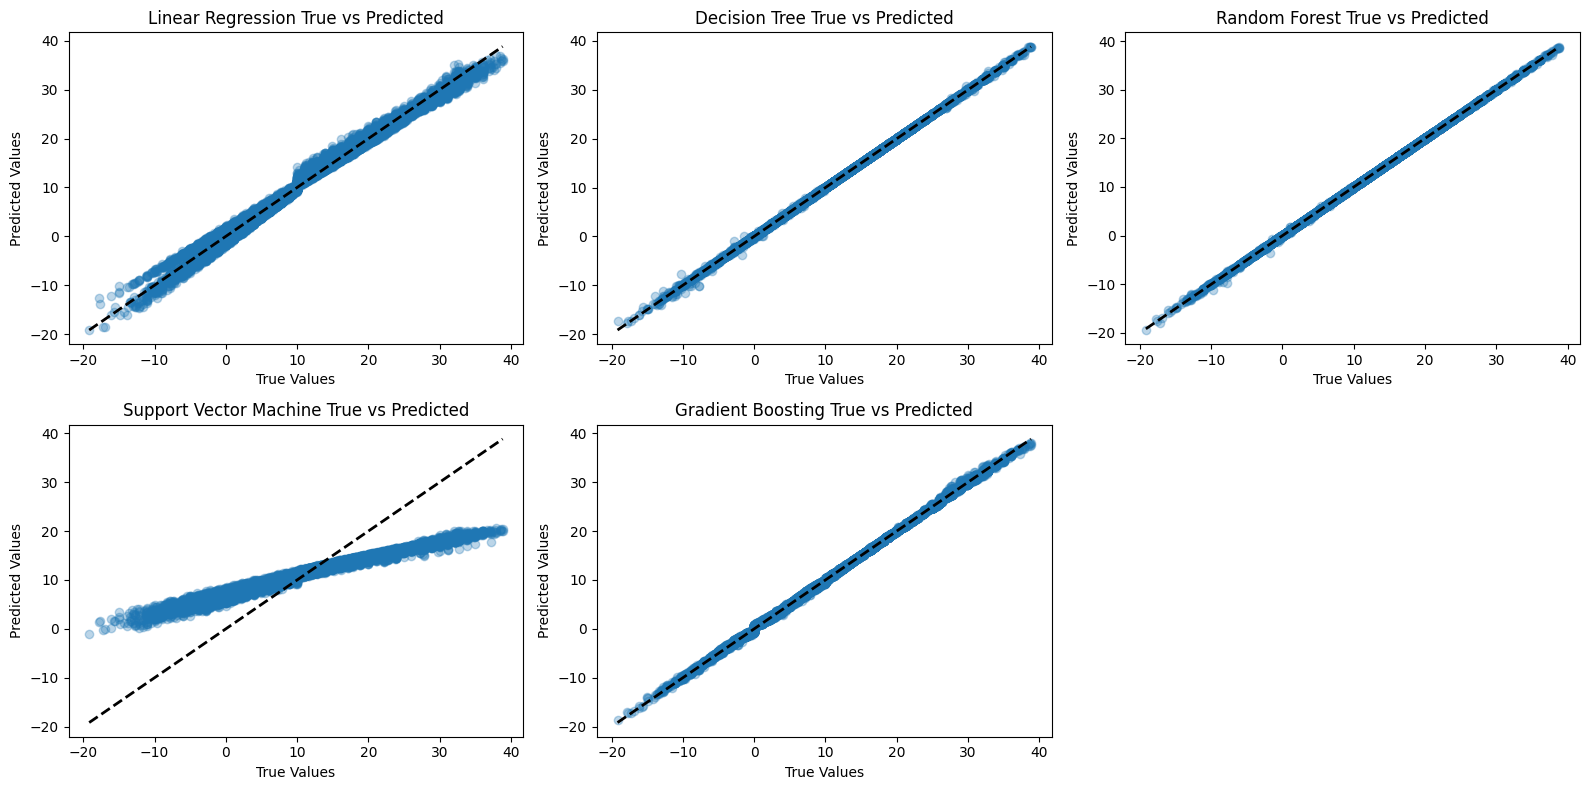

In [13]:
plt.figure(figsize=(16, 8))
for i, (name, predictions) in enumerate(predictions_dict.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, predictions, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{name} True vs Predicted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

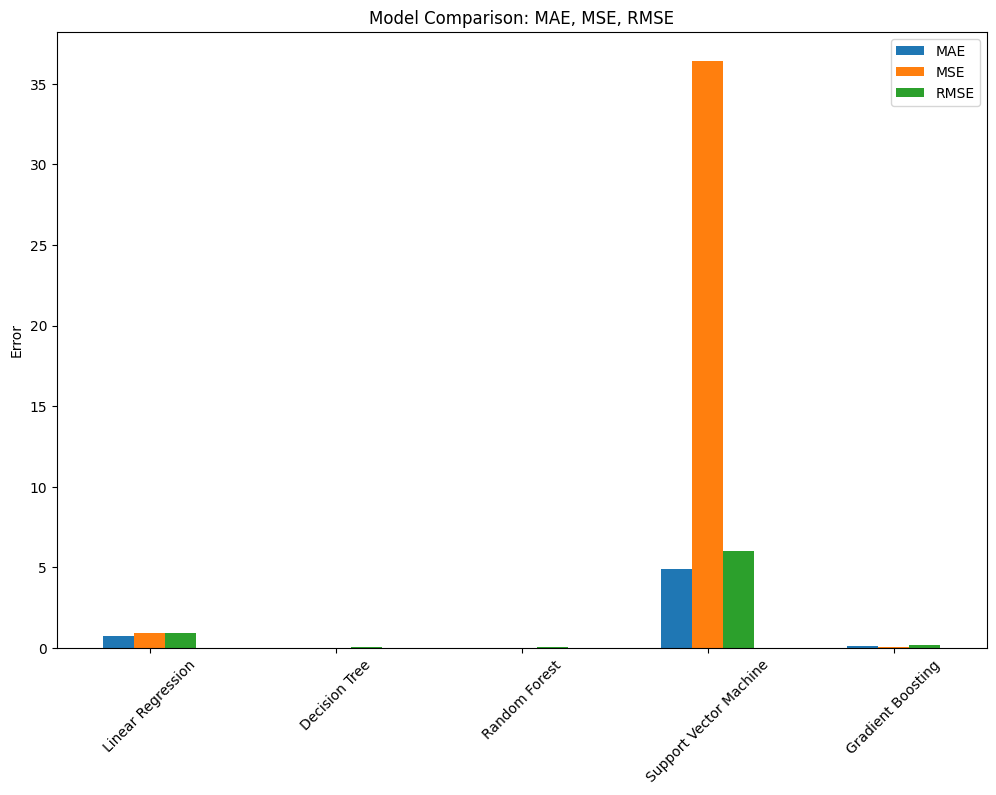

In [14]:
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison: MAE, MSE, RMSE')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()